Aquesta base de dades recull totes les dades relacionades amb la formació de les persones usuàries.

En aquest cas ens hem trobat que hi ha una entrada per a cada formació diferent que ha realitzat la persona. Hem cregut interessant mantenir la formació amb un nivell superior, ja que ens indica el nivell formatiu de la persona (la columna de nivell formatiu recollida ens indica el nivell formatiu de cadascuna de les formacions que ha realitzat la persona). Per a realitzar-ho hem creat un diccionari ordenant els diferents valors de la columna nivell formatiu, per tal de mantenir només el nivell formatiu superior.

In [1]:
import pandas as pd

In [2]:
#importar csv utf8
df=pd.read_csv('Dades Formatives.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

df_i=df
#seleccionem columnes que volem
df=df[['stic_dades_formatives_contactscontacts_ida','Formació (títol)','Nivell formatiu','Tipologia Centre formació','Estat formació','Nom del Centre formació','Fa logopèdia','Tipus comunicació al centre','Localitat Centre formació']]
#canviar nom stic_dades_formatives_contactscontacts_ida per ID
df.rename(columns={'stic_dades_formatives_contactscontacts_ida':'ID'},inplace=True)


/tmp/ipykernel_13806/613599773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'stic_dades_formatives_contactscontacts_ida':'ID'},inplace=True)


In [3]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_13806/4012389730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


,ID,Formació (títol),Nivell formatiu,Tipologia Centre formació,Estat formació,Nom del Centre formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació
0,df399c5e-a898-e1f5-f738-5eb1456dd3c7,ESTETICA,Formació Professional,NaN,Finalitzat,NaN,NaN,Oral,NaN
1,f1d56290-d2b4-17e9-77b2-5dd7e988de2d,TURISME,Universitat,NaN,En curs,NaN,NaN,NaN,NaN
2,1350ea25-b70f-e703-8caa-5bf42e3dfcf9,educació primària,Educació Primària (i EGB),NaN,Finalitzat,Escuela de Virrei Amat. Barcelona,NaN,NaN,NaN
3,af15117e-0c18-15a5-f4c5-5ce3ce9ec0d9,ALISSON BARBIERI,Educació Primària (i EGB),Ed. Especial,En curs,JOSEP PLA,Sí,NaN,BARCELONA
4,59d03389-1bd5-9fd0-b72e-5f96f735507d,CICLE DE GRAU SUPERIOR ADMINISTRACIÓ,Formació Professional,Públic,Finalitzat,IES Vallera de Salt,NaN,Oral,GIRONA


In [4]:
#tenint en compte els valors faltants i la importància de les variables seleccionem les següents columnes
df=df[['ID','Nivell formatiu','Tipologia Centre formació', 'Estat formació', 'Fa logopèdia','Tipus comunicació al centre', 'Localitat Centre formació']]


In [5]:
#valors único a Nivell formatiu
df['Nivell formatiu'].unique()

array(['Formació Professional', 'Universitat',
       'Educació Primària (i EGB)', 'Educació Infantil',
       'Formació no reglada', 'Altres (no categoritzat)',
       'Batxillerat (i COU)', 'Educació Secundària',
       'Altra formació reglada', 'Llar infants'], dtype=object)

Creem un diccionari per tal de mantenir les formacions de més nivell

In [6]:
niveles = {
    'Llar infants':0,
    'Educació Infantil':1,
    'Altres (no categoritzat)': 2,
    'Formació no reglada':3,
    'Altra formació reglada': 4,
    'Educació Primària (i EGB)': 5,
    'Educació Secundària': 6,
    'Batxillerat (i COU)': 7,
    'Formació Professional': 8,
    'Universitat': 9,
}

# Creem la columna "nivell estudis" utilizant la funció map
df['nivell estudis'] = df['Nivell formatiu'].map(niveles)
df.head()

,ID,Nivell formatiu,Tipologia Centre formació,Estat formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació,nivell estudis
0,df399c5e-a898-e1f5-f738-5eb1456dd3c7,Formació Professional,NaN,Finalitzat,NaN,Oral,NaN,8
1,f1d56290-d2b4-17e9-77b2-5dd7e988de2d,Universitat,NaN,En curs,NaN,NaN,NaN,9
2,1350ea25-b70f-e703-8caa-5bf42e3dfcf9,Educació Primària (i EGB),NaN,Finalitzat,NaN,NaN,NaN,5
3,af15117e-0c18-15a5-f4c5-5ce3ce9ec0d9,Educació Primària (i EGB),Ed. Especial,En curs,Sí,NaN,BARCELONA,5
4,59d03389-1bd5-9fd0-b72e-5f96f735507d,Formació Professional,Públic,Finalitzat,NaN,Oral,GIRONA,8


In [7]:
#unim files duplicades y mantenim el valor més alt en nivell d'estudis
indices_max =df.groupby('ID')['nivell estudis'].idxmax()
df=df.loc[indices_max]
df.head()

,ID,Nivell formatiu,Tipologia Centre formació,Estat formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació,nivell estudis
23,10031d51-3654-6bdd-ad97-5f69f0cdf888,Educació Primària (i EGB),NaN,Finalitzat,NaN,Oral,SANT CUGAT DEL VALLÈS,5
142,118cbd91-8e15-1a15-b3e3-5f6b37902fff,Formació Professional,NaN,Finalitzat,NaN,Llengua de signes,NaN,8
234,129f1ccc-bcb6-1e15-b3d3-621c846a594f,Formació Professional,NaN,Finalitzat,NaN,NaN,NaN,8
14,12cb5f09-14e2-185e-ee1d-5f69c44f499a,Educació Primària (i EGB),Concertat,En curs,Sí,Oral,SANTA COLOMA DE FARNES,5
233,130f8822-368d-f3d8-f843-5da710debfb2,Universitat,NaN,Finalitzat,NaN,Oral,NaN,9


In [8]:
#eliminar columna nivell estudis ja que la tenim duplicada
df = df.drop(['nivell estudis'], axis=1)
df.head()

,ID,Nivell formatiu,Tipologia Centre formació,Estat formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació
23,10031d51-3654-6bdd-ad97-5f69f0cdf888,Educació Primària (i EGB),NaN,Finalitzat,NaN,Oral,SANT CUGAT DEL VALLÈS
142,118cbd91-8e15-1a15-b3e3-5f6b37902fff,Formació Professional,NaN,Finalitzat,NaN,Llengua de signes,NaN
234,129f1ccc-bcb6-1e15-b3d3-621c846a594f,Formació Professional,NaN,Finalitzat,NaN,NaN,NaN
14,12cb5f09-14e2-185e-ee1d-5f69c44f499a,Educació Primària (i EGB),Concertat,En curs,Sí,Oral,SANTA COLOMA DE FARNES
233,130f8822-368d-f3d8-f843-5da710debfb2,Universitat,NaN,Finalitzat,NaN,Oral,NaN


<AxesSubplot: title={'center': 'Dades incompletes a Dades Formatives'}>

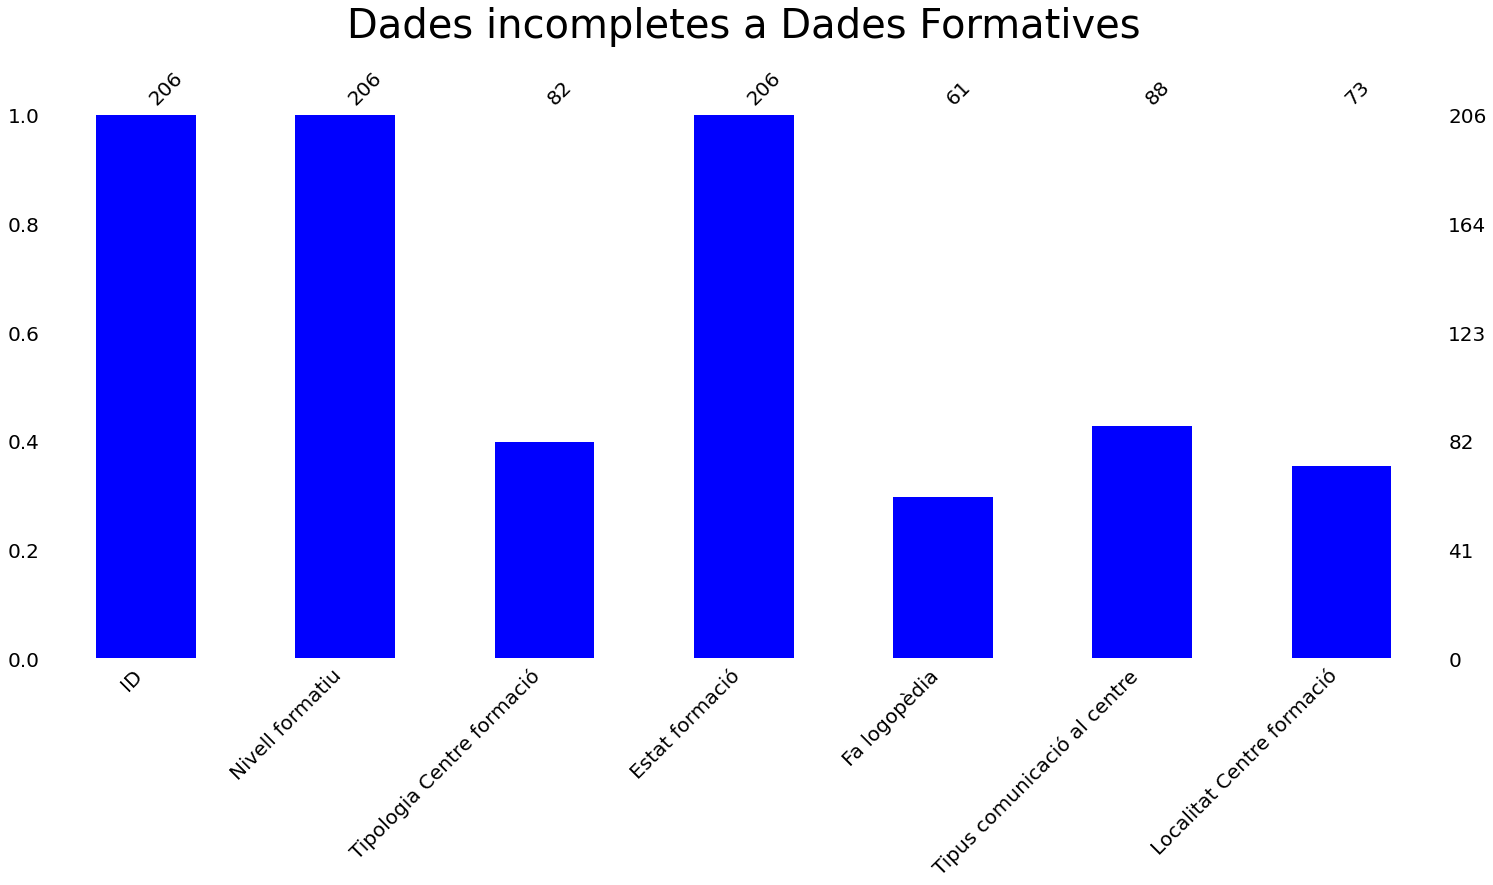

In [9]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Dades Formatives',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

No és determinant el nombre de nulls, ja que inclou usuaris sense formació (infants)
Eliminem Estat formació, ja que no està actualitzat i ens podria portar a errors

In [10]:
df=df[['ID','Nivell formatiu','Tipologia Centre formació', 'Fa logopèdia','Tipus comunicació al centre', 'Localitat Centre formació']]

In [11]:
#pasar df_dadesformatives a csv
df.to_csv('dades_formatives_f.csv', index=False, encoding='utf-8')